In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib
import time
import copy

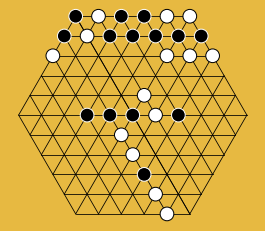

In [60]:
class Board:
    def __init__(self, layers=5, board=None):
        if not board:
            self.layers = layers
            self.board = [[0] * (2*layers+1) for _ in range(2*layers+1)]
            for i in range(layers+1, 2*layers+1):
                for j in range(i-layers):
                    self.board[i][j] = 10
                    self.board[j][i] = 10
        else:
            self.layers = int((len(board)-1)/2)
            self.board = board
    
    def get_board(self):
        return self.board

    # transform index of board into the location of stone in picture.
    # [i][j] -> (x, y) in picture
    def index_to_loc(self, i, j):
        # The unit length in picture
        unit_x = 1
        unit_y = np.sqrt(3)/2
        #unit_y = 1
        y = -i * unit_y
        if i <= self.layers:
            x = j * unit_x - 0.5 * i * unit_x
        else:
            x = (j - (i - self.layers)) * unit_x - 0.5 * (2*self.layers - i) * unit_x
        return x, y

    def plot_board(self, board=None):
        if board is not None:
            self.board = board
        # Baisc setting
        figure, axes = plt.subplots(facecolor=(231/255,185/255,65/255))
        axes.axis('off')
        axes.set_aspect('equal')
        
        # draw the lines
        lines_row = []
        lines_col = []
        lines_dia = []
        for i in range(2*self.layers+1):
            if i <= self.layers:
                begin_i_index = i
                begin_j_index = 0
                end_i_index = i
                end_j_index = self.layers + i
            else:
                begin_i_index = i
                begin_j_index = i - self.layers
                end_i_index = i
                end_j_index = 2 * self.layers
            # draw row lines
            begin_x, begin_y = self.index_to_loc(begin_i_index, begin_j_index)
            end_x, end_y = self.index_to_loc(end_i_index, end_j_index)
            lines_row.append([[begin_x, end_x], [begin_y, end_y]])
            # draw col lines
            begin_x, begin_y = self.index_to_loc(begin_j_index, begin_i_index)
            end_x, end_y = self.index_to_loc(end_j_index, end_i_index)
            lines_col.append([[begin_x, end_x], [begin_y, end_y]])
            
        # draw diagonal lines
        for i in range(self.layers+1):
            begin_i_index = i
            begin_j_index = 0
            end_i_index = 2 * self.layers
            end_j_index = 2 * self.layers - i

            begin_x, begin_y = self.index_to_loc(begin_i_index, begin_j_index)
            end_x, end_y = self.index_to_loc(end_i_index, end_j_index)
            lines_dia.append([[begin_x, end_x], [begin_y, end_y]])

            begin_x, begin_y = self.index_to_loc(begin_j_index, begin_i_index)
            end_x, end_y = self.index_to_loc(end_j_index, end_i_index)
            lines_dia.append([[begin_x, end_x], [begin_y, end_y]])
        
        for lines in [lines_row, lines_col, lines_dia]:
            for x, y in lines:
                axes.plot(x, y, c='k', zorder=1, linewidth=0.8)

        # draw stones
        n = len(self.board)
        for i in range(n):
            for j in range(n):
                if np.abs(self.board[i][j]) == 1:
                    if self.board[i][j] == -1:
                        facecolor = "white"
                        edgecolor = "black"
                    else:
                        facecolor = "black"
                        edgecolor = "white"
                    x, y = self.index_to_loc(i, j)
                    circle = Circle((x, y), radius=0.3, facecolor=facecolor, edgecolor=edgecolor, zorder=2)
                    axes.add_artist(circle)
        
        plt.show()

board = [[1, -1, 1, 1, -1, -1, 10, 10, 10, 10, 10], 
         [1, -1, 1, 1, 1, 1, 1, 10, 10, 10, 10], 
         [-1, 0, 0, 0, 0, -1, -1, -1, 10, 10, 10], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10], 
         [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 10], 
         [0, 0, 0, 1, 1, 1, -1, 1, 0, 0, 0], 
         [10, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], 
         [10, 10, 0, 0, 0, 0, -1, 0, 0, 0, 0], 
         [10, 10, 10, 0, 0, 0, 0, 1, 0, 0, 0], 
         [10, 10, 10, 10, 0, 0, 0, 0, -1, 0, 0], 
         [10, 10, 10, 10, 10, 0, 0, 0, 0, -1, 0]] 

A = Board(board=board)
board_A = A.get_board()
A.plot_board()

In [13]:
def check(board, win_num=5):
    
    def check_one_direction(i, j, direction):
        # direction = (di, dj)
        # return the number of stones in one directions
        n = len(board)
        di, dj = direction
        color = board[i][j]
        i += di
        j += dj
        num_connected = 0
        while 0 <= i < n and 0 <= j < n and board[i][j] == color:
            num_connected += 1
            i += di
            j += dj
        return num_connected
    
    n = len(board)
    Flag_finish = True
    
    for i in range(n):
        for j in range(n):
            if board[i][j] == 0:
                Flag_finish = False
                continue
            if np.abs(board[i][j]) == 1:
                
                num_left = check_one_direction(i, j, (0, -1))
                num_right = check_one_direction(i, j, (0, 1))
                num_row = num_left + num_right + 1
                
                num_up = check_one_direction(i, j, (-1, 0))
                num_down = check_one_direction(i, j, (1, 0))
                num_col = num_up + num_down + 1
                
                num_up_left = check_one_direction(i, j, (-1, -1))
                num_down_right = check_one_direction(i, j, (1, 1))
                num_dia = num_up_left + num_down_right + 1
     
                if num_row == win_num or num_col == win_num or num_dia== win_num:
                    # print(num_row,num_col,num_dia)
                    return (board[i][j], True)
    if Flag_finish:
        return (0, True)
    else:
        return (0, False)

# Board with 3 layers

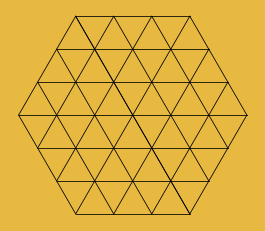

In [5]:
A = Board(layers=3)
board_A = A.get_board()
A.plot_board()

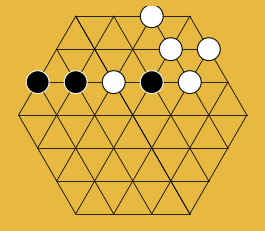

In [18]:
board = [[0, 0, -1, 0, 10, 10, 10],
         [0, 0, 0, -1, -1, 10, 10],
         [1, 1, -1, 1, -1, 0, 10],
         [0, 0, 0, 0, 0, 0, 0],
         [10, 0, 0, 0, 0, 0, 0],
         [10, 10, 0, 0, 0, 0, 0],
         [10, 10, 10, 0, 0, 0, 0]]

A = Board(board=board)
A.plot_board()

In [19]:
check(board, 3)

(-1, True)

# MCTS

In [103]:
class Node:
    def __init__(self, board, parent=None, action=None):
        """
            self.board: the matrix of board (state)
            self.action: (i, j) the location of stone put in this step
            self.Q: the number of victory
            self.N: the number of simulation
        """
        self.board = board
        self.action = action
        self.Q = 0
        self.N = 0
        self.parent = parent
        self.unvisited_nodes = self.get_unvisited_nodes()
        self.children = []
    
    def get_unvisited_nodes(self):
        """
            return the places (i, j) that can put a new stone
        """
        n = len(self.board)
        unvisited_nodes = []
        for i in range(n):
            for j in range(n):
                if self.board[i][j] == 0:
                    unvisited_nodes.append((i, j))
        return unvisited_nodes
    
    def UST(self, c=1):
        return self.Q / self.N + c * np.sqrt(np.log(self.parent.N) / self.N)

In [124]:
class MCTS:
    def __init__(self):
        self.root = None
        pass
    
    # tool functions
    def get_root(self):
        return self.root
    
    def get_best_next_step(self, board, player):
        self.root = Node(board)
        start_time = time.time()
        
        while time.time() - start_time < 5:
            self.selection(self.root, player)
        
        best_node = max(self.root.children, key=lambda x: x.UST())
        
        picture = Board(board=best_node.board)
        picture.plot_board()
        
        self.get_children_score(self.root)
        return best_node
    
    def get_children_score(self, node):
        print(f"Q: {node.Q}, N: {node.N}")
        for child in node.children:
            print(f"action: {child.action}")
            print(f"Q: {child.Q}, N: {child.N}")
    
    # important
    def selection(self, node, player):
        """
            play: 1 or -1 denotes black stone or white stone
        """
        winner, if_finish = check(node.board)
        # 1. judge whether finish
        if if_finish:
            # back propagation
            if winner == player:
                result_game = 1
            else:
                result_game = 0
            self.back_propagation(node, result_game)
            return
        
        # 2. judge whether existing any unvisited nodes
        if node.unvisited_nodes:
            # randomly pick a place to put a new stone
            np.random.shuffle(node.unvisited_nodes)
            # action = (next_i, next_j)
            action = node.unvisited_nodes.pop()
            
            # enter expansion
            self.expansion(node, action, player)
        else:
            next_node = max(node.children, key=lambda x: x.UST())
            # recursion
            self.selection(next_node, player)
        return
    
    def expansion(self, node, action, player):
        # create a new node
        next_i, next_j = action
        board = copy.deepcopy(node.board)
        
        # update the board with action
        board[next_i][next_j] = player
        
        # link the node and next_node
        next_node = Node(board, node, action)
        node.children.append(next_node)
        
        # enter simulation for giving new node a initial score -> Q and N
        self.simulation(next_node, player)
        
    def simulation(self, node, player):
        board = copy.deepcopy(node.board)
        n = len(board)
        cur_player = player
        
        winner, if_finish = check(board)
        while if_finish == False:
            # player has put its stone in the board
            # so the opponent takes the first action
            cur_player *= -1
            i, j = np.random.randint(0, n, 2)
            while board[i][j] != 0:
                i, j = np.random.randint(0, n, 2)
            board[i][j] = cur_player
            winner, if_finish = check(board)

        if winner == 0:
            result_game = 1 if player == -1 else 0
        else:
            result_game = 1 if winner == player else 0
        # after simulation
        self.back_propagation(node, result_game)
    
    def back_propagation(self, node, result_game):
        """
            node: which node need to be updated
            result_game: the result of game 1 or 0
        """
        while node:
            node.Q += result_game
            node.N += 1
            node = node.parent

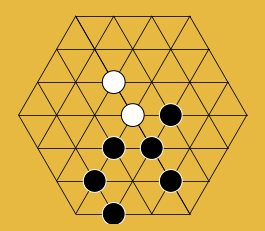

In [130]:
mcts = MCTS()
board = [[0, 0, 0, 0, 10, 10, 10],
         [0, 0, 0, 0, 0, 10, 10],
         [0, 0, -1, 0, 0, 0, 10],
         [0, 0, 0, -1, 1, 0, 0],
         [10, 0, 0, 1, 1, 0, 0],
         [10, 10, 0, 1, 0, 1, 0],
         [10, 10, 10, 0, 1, 0, 0]]
pic = Board(layers=3)
pic.plot_board(board)

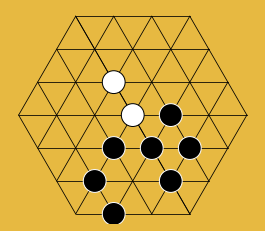

Q: 1083, N: 1647
action: (5, 4)
Q: 143, N: 179
action: (0, 2)
Q: 28, N: 47
action: (0, 3)
Q: 22, N: 39
action: (1, 2)
Q: 13, N: 27
action: (0, 0)
Q: 10, N: 23
action: (1, 3)
Q: 19, N: 35
action: (2, 4)
Q: 40, N: 61
action: (2, 0)
Q: 12, N: 26
action: (3, 5)
Q: 31, N: 50
action: (2, 3)
Q: 31, N: 50
action: (3, 6)
Q: 8, N: 21
action: (1, 0)
Q: 46, N: 68
action: (1, 4)
Q: 22, N: 39
action: (6, 5)
Q: 10, N: 23
action: (3, 2)
Q: 44, N: 66
action: (4, 5)
Q: 102, N: 132
action: (5, 6)
Q: 48, N: 71
action: (1, 1)
Q: 47, N: 70
action: (3, 0)
Q: 35, N: 55
action: (3, 1)
Q: 28, N: 47
action: (5, 2)
Q: 36, N: 56
action: (4, 1)
Q: 6, N: 18
action: (2, 5)
Q: 5, N: 16
action: (0, 1)
Q: 28, N: 47
action: (4, 2)
Q: 138, N: 173
action: (6, 6)
Q: 34, N: 54
action: (4, 6)
Q: 23, N: 40
action: (2, 1)
Q: 57, N: 81
action: (6, 3)
Q: 17, N: 33


In [136]:
best_node = mcts.get_best_next_step(board, 1)

In [137]:
root = mcts.get_root()
good_nodes = sorted(root.children, key=lambda x: x.Q/x.N, reverse=True)

(5, 4) win rate: 0.7988826815642458


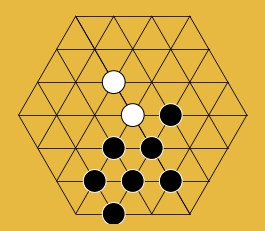

(4, 2) win rate: 0.7976878612716763


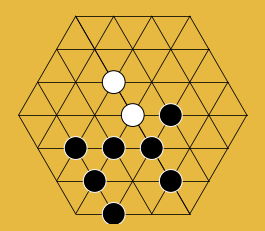

(4, 5) win rate: 0.7727272727272727


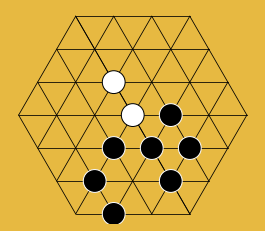

(2, 1) win rate: 0.7037037037037037


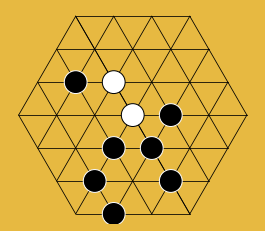

(1, 0) win rate: 0.6764705882352942


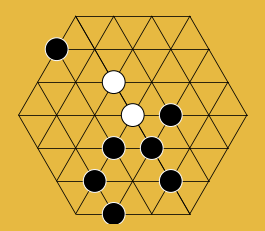

(5, 6) win rate: 0.676056338028169


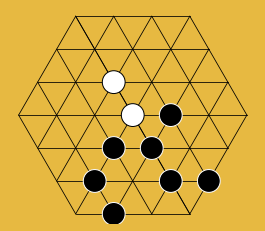

In [139]:
for node in good_nodes[:6]:
    print(node.action, f"win rate: {node.Q/node.N}")
    pic.plot_board(node.board)